In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definindo nomes das colunas

O Dataset traz os nomes das colunas separados dos dados. Para fins de visualização, estes nomes são recuperados manualmente a seguir.

In [15]:
numeric_columns = [
    "Elevation",
    "Aspect",
    "Slope",
    "Hydrology_Hdst",
    "Hydrology_Vdst",
    "Roadways_Hdst",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "FirePoints_Hdst",
]

wilderness_area_columns = [
    "WA_Rawah",
    "WA_Neota",
    "WA_Comanche_P",
    "WA_Cache_la_P"
]

soil_columns = []
for i in range(1,41):
    soil_columns.append("Soil_Type_{}".format(i))

column_names = numeric_columns + wilderness_area_columns + soil_columns + ["Cover_Type"]

print(column_names)
print("Total de colunas: " + str(len(column_names)))

['Elevation', 'Aspect', 'Slope', 'Hydrology_Hdst', 'Hydrology_Vdst', 'Roadways_Hdst', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'FirePoints_Hdst', 'WA_Rawah', 'WA_Neota', 'WA_Comanche_P', 'WA_Cache_la_P', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type']
Total de colunas: 55


# Carregando o dataset

In [16]:
pd.set_option('display.max_columns', None) # Mostra todas as colunas
# df = pd.read_csv('covtype.data', names=column_names)
df = pd.read_csv('covtype.data', names=column_names)
df

,Elevation,Aspect,Slope,Hydrology_Hdst,Hydrology_Vdst,Roadways_Hdst,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,FirePoints_Hdst,WA_Rawah,WA_Neota,WA_Comanche_P,WA_Cache_la_P,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


# Desfazendo formatações
Como esse dataset já vinha com algumas formatações, como One Hot Enconding, fez-se necessário desfazer, de modo que possamos analisar os dados de maneira mais íntegra.

## Removendo One-Hot-Encondings(SoilType)

In [17]:
# Seleciona o nome da coluna de solo correspondente para cada entrada
soil_decoded = (df[soil_columns] == 1).idxmax(1)

# Passa a string para um valor numérico correspondendo ao seu
# codigo de solo constante no arquivo .info.
# Isto é, "Soil_Type_1" passa a ser apenas 1.
# (13 é o índice da última coluna que antecede as coluna
# de solo no dataset)
soil_decoded = soil_decoded.map(lambda x : df.columns.get_loc(x) - 13)
soil_decoded

0         29
1         29
2         12
3         30
4         29
          ..
581007     2
581008     2
581009     2
581010     2
581011     2
Length: 581012, dtype: int64

In [18]:
df['Soil_Type'] = soil_decoded

## Informações básicas sobre os atributos do dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Elevation        581012 non-null  int64
 1   Aspect           581012 non-null  int64
 2   Slope            581012 non-null  int64
 3   Hydrology_Hdst   581012 non-null  int64
 4   Hydrology_Vdst   581012 non-null  int64
 5   Roadways_Hdst    581012 non-null  int64
 6   Hillshade_9am    581012 non-null  int64
 7   Hillshade_Noon   581012 non-null  int64
 8   Hillshade_3pm    581012 non-null  int64
 9   FirePoints_Hdst  581012 non-null  int64
 10  WA_Rawah         581012 non-null  int64
 11  WA_Neota         581012 non-null  int64
 12  WA_Comanche_P    581012 non-null  int64
 13  WA_Cache_la_P    581012 non-null  int64
 14  Soil_Type_1      581012 non-null  int64
 15  Soil_Type_2      581012 non-null  int64
 16  Soil_Type_3      581012 non-null  int64
 17  Soil_Type_4      581012 non-n

## Formatando os nomes
Adicionando nomes na coluna de COVER_TYPE para melhor compreensão dos dados


In [20]:
def forest(x):
    if x==1:
        return 'Spruce/Fir'
    elif x==2:
        return 'Lodgepole Pine'
    elif x==3:
        return 'Ponderosa Pine'
    elif x==4:
        return 'Cottonwood/Willow'
    elif x==5:
        return 'Aspen'
    elif x==6:
        return 'Douglas-fir'
    elif x==7:
        return 'Krummholz'
    
df['Cover_Type'] = df['Cover_Type'].apply(lambda x: forest(x))
df['Cover_Type']

0                  Aspen
1                  Aspen
2         Lodgepole Pine
3         Lodgepole Pine
4                  Aspen
               ...      
581007    Ponderosa Pine
581008    Ponderosa Pine
581009    Ponderosa Pine
581010    Ponderosa Pine
581011    Ponderosa Pine
Name: Cover_Type, Length: 581012, dtype: object

## Análise exploratória visual
Visualização dos valores das colunas numéricas em histograma.

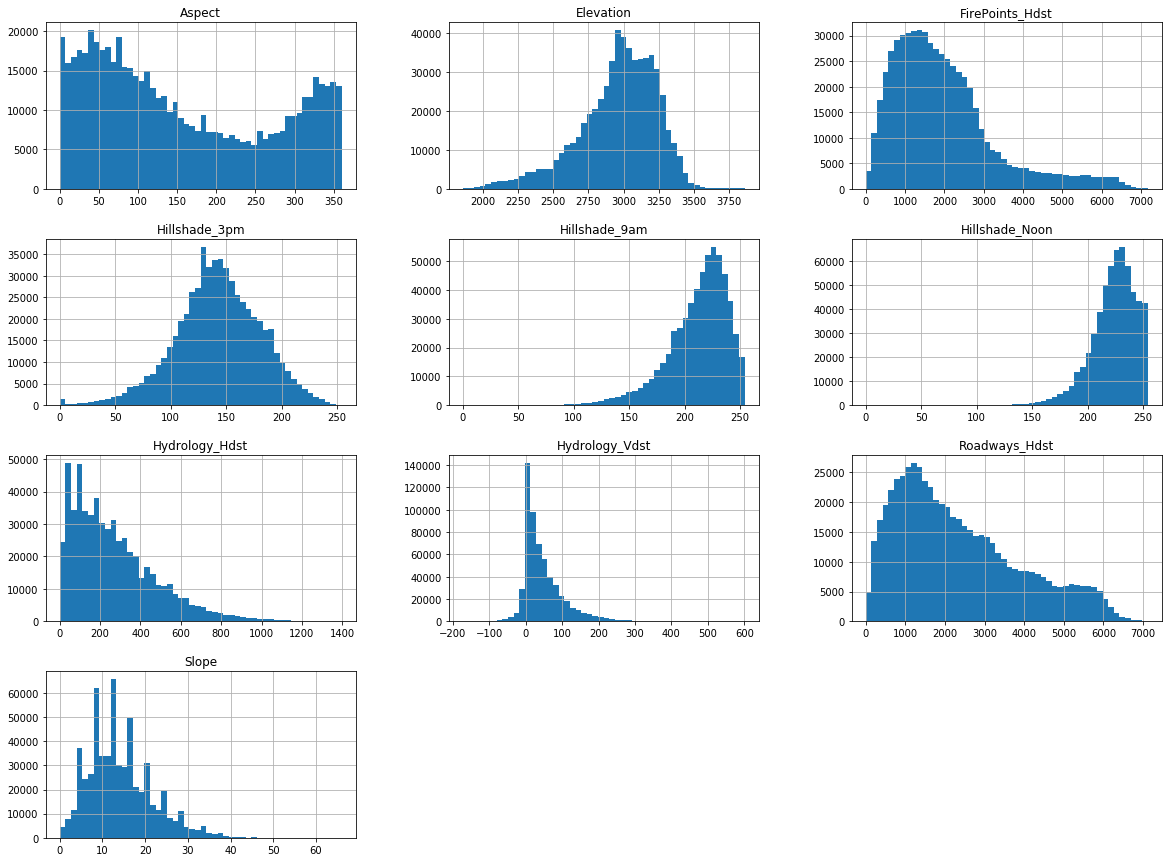

In [21]:
import matplotlib.pyplot as plt

df[numeric_columns].hist(bins=50, figsize=(20,15))
plt.show()

Quantidade de entradas para cada um dos 40 tipos de solo:

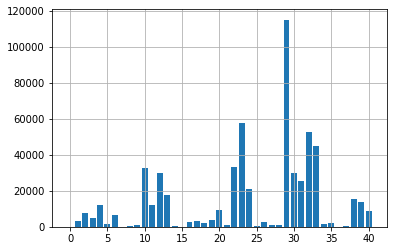

In [22]:
df["Soil_Type"].hist(bins=range(42), align='left', rwidth=0.8)

Quantidade de entradas para cada tipo de cobertura florestal (atributo alvo):

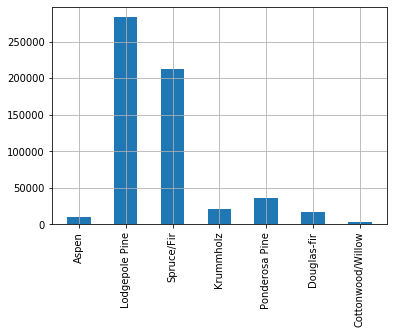

In [23]:
df["Cover_Type"].hist(bins=range(8), align='left', rwidth=0.5)
plt.xticks(rotation = 90)
plt.show()

Para ter um maior domínio sobre o dataset, foram plotados alguns gráficos com a intenção de buscar relações que possam existir entre as colunas.

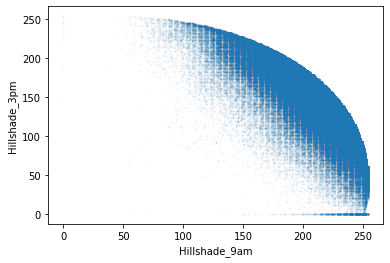

In [24]:
df.plot.scatter(x='Hillshade_9am', y='Hillshade_3pm', s=1, alpha=0.05)
plt.show()

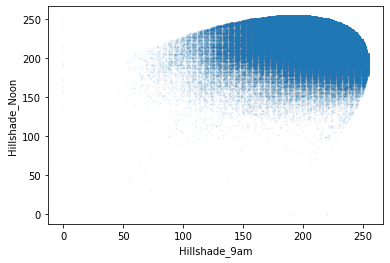

In [25]:
df.plot.scatter(x='Hillshade_9am', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

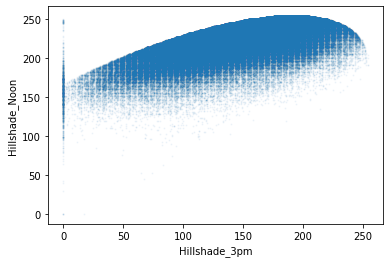

In [26]:
df.plot.scatter(x='Hillshade_3pm', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

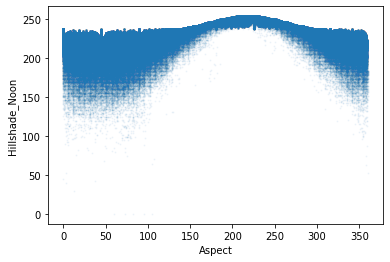

In [27]:
df.plot.scatter(x='Aspect', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

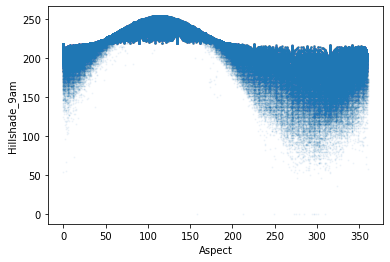

In [28]:
df.plot.scatter(x='Aspect', y='Hillshade_9am', s=1, alpha=0.05)
plt.show()

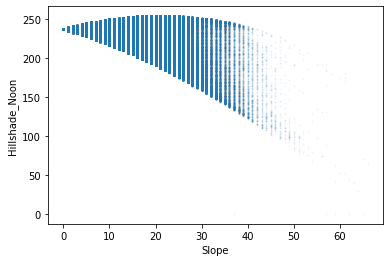

In [29]:
df.plot.scatter(x='Slope', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

## Analisando as correlações entre as colunas numéricas

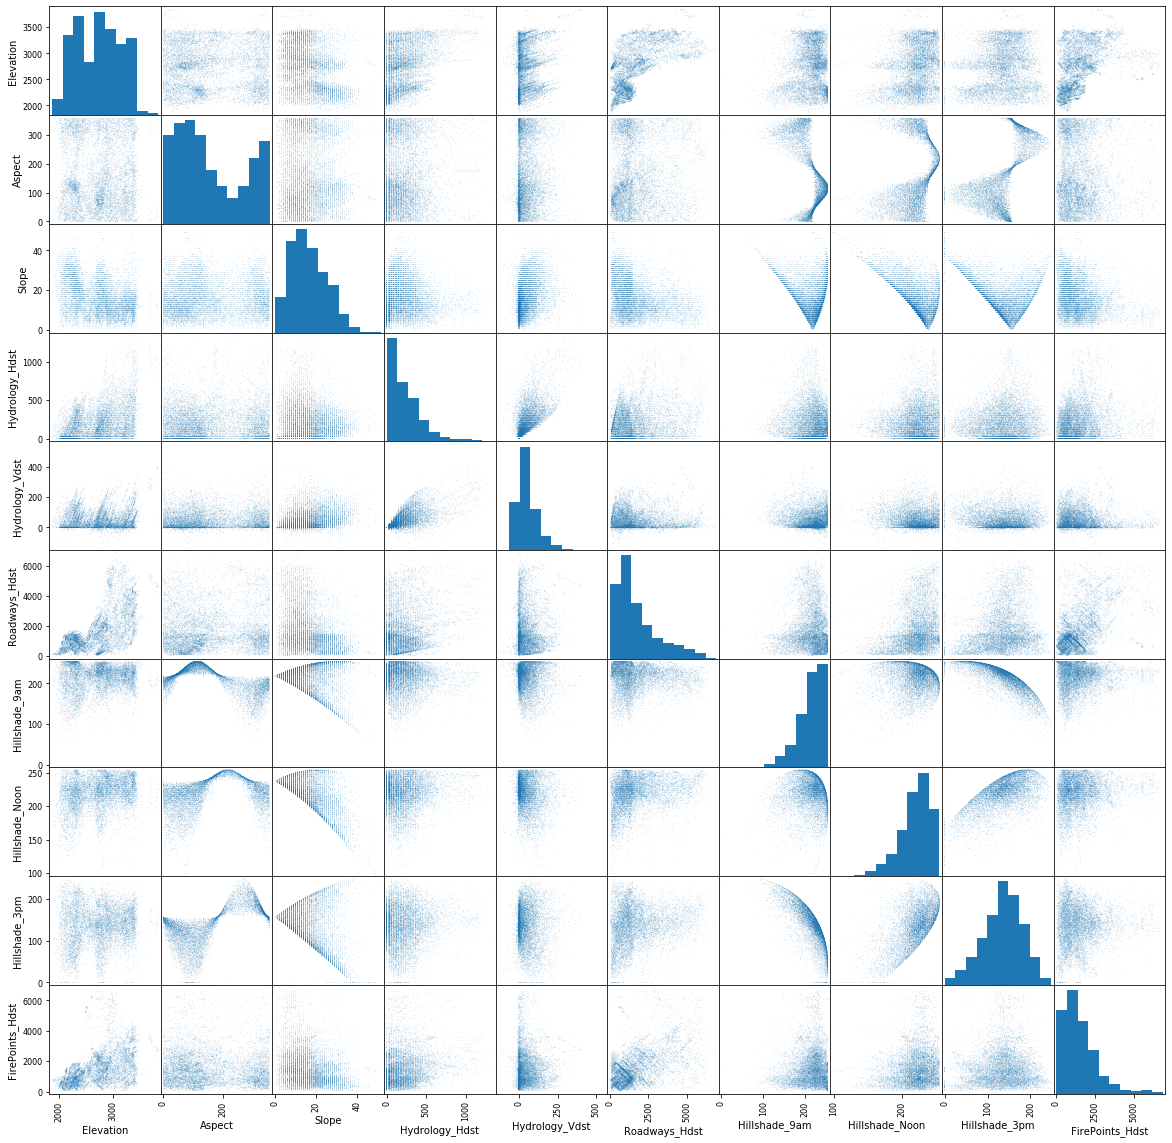

In [30]:
# Diminuir o numero de entradas usadas em head() se este plot estiver demorando demais.
# Lembrando que este dataset possui 581 mil entradas.
sct_mat = pd.plotting.scatter_matrix(df[numeric_columns].head(10000),figsize=(20, 20), s=1)
plt.show()

A tabela a seguir mostra a correlação de Pearson para cada uma das combinações de atributos numéricos do dataset.

Nenhum dos pares de colunas possui correlação que justifique a retirada de alguma das colunas do dataset para fins de treinamento.

In [31]:
corr_matrix = pd.DataFrame(np.corrcoef(df[numeric_columns], rowvar=False), index=numeric_columns, columns=numeric_columns)

color_map = sns.diverging_palette(260, 10, l=60, s=60, sep=10, as_cmap=True)

corr_matrix.style.background_gradient(color_map, axis=None, vmin=-1, vmax=1)


,Elevation,Aspect,Slope,Hydrology_Hdst,Hydrology_Vdst,Roadways_Hdst,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,FirePoints_Hdst
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Hydrology_Hdst,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Hydrology_Vdst,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Roadways_Hdst,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
FirePoints_Hdst,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


# Divisão do dataset para treino e teste

Um quinto do dataset será reservado para testar o resultado do treinamento que será feito com os dados restantes.

In [74]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

A coluna Soil_Type que foi inserida anteriormente não é mais útil. Ela já está binarizada no dataset original e não deve aparecer no treino.

O atributo alvo é separado dos datasets.

In [75]:
y_train = df_train["Cover_Type"].values
y_test = df_test["Cover_Type"].values
df_train = df_train.drop(columns = ["Soil_Type", "Cover_Type"])
df_test = df_test.drop(columns = ["Soil_Type", "Cover_Type"])

# Pré-processamento dos dados

Atributos numéricos devem ser ajustados.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [35]:
df_numeric = df_train[numeric_columns]
scaler = StandardScaler()
scaler.fit(df_numeric)
scaler.mean_

array([2959.62866253,  155.77848536,   14.10169554,  269.36988311,
         46.46726505, 2350.85828803,  212.14110312,  223.35016964,
        142.56487934, 1983.06556887])

In [36]:
pipeline_numeric = Pipeline([ ('scaler', StandardScaler()) ])

preprocessor = ColumnTransformer([
    ('numericos', pipeline_numeric, numeric_columns),
    ('binarios', 'passthrough', wilderness_area_columns + soil_columns)
    ]
)

X_train = preprocessor.fit_transform(df_train)
X_test = preprocessor.transform(df_test)

Verificando se as médias estão em torno de zero.

In [37]:
X_train[:, 0 : len(numeric_columns)].mean(axis=0)

array([ 2.90723754e-16,  1.37122309e-17, -6.22782929e-17,  7.08503481e-17,
        7.75039139e-17,  1.15262231e-16, -4.01675117e-16, -9.70709769e-17,
        1.59349270e-16,  2.41530935e-17])

# Regressão logística

O processo de treinamento deste dataset por regressão logística exige uma quantidade razoavelmente grande de iterações para que haja convergência.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
log_reg.classes_

### Probabilidades de pertencimento a uma determinada classe
Para as primeiras entradas do conjunto de teste:

In [39]:
y_probabilities = log_reg.predict_proba(X_test)

# printoptions para operações dentro do escopo do with
# suppress=true evita notação científica
with np.printoptions(precision=4, suppress=True):
    #primeiros 20 resultados
    print(np.round(y_probabilities[0:20], decimals=4))

[[0.0141 0.     0.0026 0.0001 0.8456 0.016  0.1216]
 [0.0008 0.     0.     0.0186 0.4851 0.     0.4955]
 [0.     0.0046 0.4022 0.     0.0064 0.5867 0.    ]
 [0.02   0.     0.     0.0001 0.852  0.     0.1279]
 [0.0121 0.     0.0037 0.0002 0.679  0.     0.305 ]
 [0.0099 0.     0.     0.     0.8734 0.     0.1167]
 [0.1983 0.     0.     0.0001 0.5876 0.     0.214 ]
 [0.0176 0.     0.0119 0.     0.8789 0.0109 0.0807]
 [0.0096 0.     0.     0.0016 0.5395 0.     0.4493]
 [0.0278 0.0002 0.0503 0.     0.7153 0.198  0.0084]
 [0.0049 0.     0.     0.0114 0.3154 0.     0.6683]
 [0.0003 0.     0.     0.     0.6882 0.     0.3114]
 [0.0533 0.     0.     0.0001 0.8504 0.     0.0963]
 [0.     0.     0.     0.3115 0.0325 0.     0.6561]
 [0.0002 0.     0.     0.0024 0.3994 0.     0.5981]
 [0.092  0.     0.0393 0.     0.7741 0.0027 0.0918]
 [0.0168 0.     0.0011 0.0002 0.8133 0.001  0.1676]
 [0.0065 0.     0.     0.0001 0.8326 0.     0.1608]
 [0.     0.1458 0.0712 0.     0.0001 0.7829 0.    ]
 [0.0188 0. 

Usando o modelo para fazer a predição sobre o conjunto de teste:

In [40]:
y_prediction = log_reg.predict(X_test)
y_prediction

array(['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Spruce/Fir'], dtype=object)

### Avaliação de desempenho:

In [41]:
from sklearn.metrics import accuracy_score    # TP+TN / N
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score   # VP / (VP+FP)
from sklearn.metrics import recall_score      # VP / (VP+FN)
from sklearn.metrics import f1_score          # Média harmônica entre precisão e revocação (recall)

In [42]:
labels = df['Cover_Type'].unique()

In [76]:
print('Acurácia:', accuracy_score(y_test, y_prediction))
print('Precisão(weighted):', precision_score(y_test, y_prediction, labels, average='weighted'))
print('Recall(weighted):', recall_score(y_test, y_prediction, labels, average='weighted'))
print('f1(weighted):', f1_score(y_test, y_prediction, labels, average='weighted'))

Acurácia: 0.7236474101357108
Precisão(weighted): 0.7124632191532111
Recall(weighted): 0.7236474101357108
f1(weighted): 0.7138216690836332


In [44]:
conf_matrix_log_reg = confusion_matrix(y_test, y_prediction, labels)
pd.DataFrame(conf_matrix_log_reg, index=labels, columns=labels)

,Aspen,Lodgepole Pine,Spruce/Fir,Krummholz,Ponderosa Pine,Douglas-fir,Cottonwood/Willow
Aspen,15,1838,8,0,60,8,0
Lodgepole Pine,34,45323,10259,33,632,318,3
Spruce/Fir,0,11877,29493,886,9,10,0
Krummholz,0,40,1745,2301,0,0,0
Ponderosa Pine,3,753,0,0,5801,595,117
Douglas-fir,2,800,0,0,1767,915,12
Cottonwood/Willow,0,1,0,0,238,65,242


# Árvore de Decisão

In [45]:
from sklearn.tree import DecisionTreeClassifier

my_tree = DecisionTreeClassifier(max_depth=8)
my_tree.fit(X_train, y_train)
my_tree.classes_

array(['Aspen', 'Cottonwood/Willow', 'Douglas-fir', 'Krummholz',
       'Lodgepole Pine', 'Ponderosa Pine', 'Spruce/Fir'], dtype=object)

### Probabilidade estimada pela Árvore de Decisão
Para as 20 primeiras entradas.

In [46]:
y_prob_tree = my_tree.predict_proba(X_test)
np.round(y_prob_tree[:20],decimals=2)

array([[0.  , 0.  , 0.  , 0.  , 0.77, 0.  , 0.23],
       [0.  , 0.  , 0.  , 0.  , 0.92, 0.  , 0.08],
       [0.  , 0.02, 0.17, 0.  , 0.02, 0.79, 0.  ],
       [0.02, 0.  , 0.  , 0.  , 0.9 , 0.  , 0.09],
       [0.06, 0.  , 0.03, 0.  , 0.75, 0.02, 0.15],
       [0.02, 0.  , 0.  , 0.  , 0.9 , 0.  , 0.09],
       [0.34, 0.  , 0.  , 0.  , 0.36, 0.  , 0.3 ],
       [0.06, 0.  , 0.03, 0.  , 0.75, 0.02, 0.15],
       [0.  , 0.  , 0.  , 0.  , 0.57, 0.  , 0.43],
       [0.02, 0.  , 0.2 , 0.  , 0.58, 0.18, 0.03],
       [0.  , 0.  , 0.  , 0.  , 0.64, 0.  , 0.36],
       [0.02, 0.  , 0.  , 0.  , 0.78, 0.  , 0.19],
       [0.02, 0.  , 0.  , 0.  , 0.9 , 0.  , 0.09],
       [0.  , 0.  , 0.  , 0.58, 0.02, 0.  , 0.4 ],
       [0.  , 0.  , 0.  , 0.01, 0.06, 0.  , 0.92],
       [0.1 , 0.  , 0.01, 0.  , 0.42, 0.  , 0.47],
       [0.  , 0.  , 0.  , 0.  , 0.79, 0.  , 0.21],
       [0.02, 0.  , 0.  , 0.  , 0.9 , 0.  , 0.09],
       [0.  , 0.89, 0.03, 0.  , 0.  , 0.08, 0.  ],
       [0.02, 0.  , 0.  , 0.  ,

### Previsões do modelo

In [47]:
y_predict_tree = my_tree.predict(X_test)
y_predict_tree

array(['Lodgepole Pine', 'Lodgepole Pine', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Spruce/Fir'], dtype=object)

### Avaliação de desempenho

In [48]:
print("Acurácia: ", accuracy_score(y_test,y_predict_tree))
print('Precisão(weighted):', precision_score(y_test, y_predict_tree, labels, average='weighted'))
print('Recall(weighted):', recall_score(y_test, y_predict_tree, labels, average='weighted'))
print('f1(weighted):', f1_score(y_test, y_predict_tree, labels, average='weighted'))

Acurácia:  0.7451786959028597
Precisão(weighted): 0.7450334061943782
Recall(weighted): 0.7451786959028597
f1(weighted): 0.7295630737163309


### Desenho da Árvore

[Text(659.6025, 616.08, 'Elevation <= 0.303\ngini = 0.623\nsamples = 100.0%\nvalue = [0.016, 0.005, 0.03, 0.035, 0.488, 0.061, 0.365]\nclass = Lodgepole Pine'),
 Text(324.57, 543.6, 'Elevation <= -1.605\ngini = 0.553\nsamples = 58.0%\nvalue = [0.028, 0.008, 0.051, 0.0, 0.635, 0.106, 0.171]\nclass = Lodgepole Pine'),
 Text(173.538, 471.12, 'Hydrology_Hdst <= -1.197\ngini = 0.582\nsamples = 7.3%\nvalue = [0.003, 0.064, 0.281, 0.0, 0.078, 0.574, 0.0]\nclass = Ponderosa Pine'),
 Text(91.14, 398.64000000000004, 'WA_Comanche_P <= 0.5\ngini = 0.713\nsamples = 0.5%\nvalue = [0.005, 0.351, 0.298, 0.0, 0.081, 0.263, 0.003]\nclass = Cottonwood/Willow'),
 Text(47.616, 326.16, 'Elevation <= -2.213\ngini = 0.652\nsamples = 0.4%\nvalue = [0.007, 0.487, 0.129, 0.0, 0.081, 0.296, 0.0]\nclass = Cottonwood/Willow'),
 Text(23.808, 253.68, 'Hillshade_9am <= -0.659\ngini = 0.545\nsamples = 0.3%\nvalue = [0.0, 0.592, 0.091, 0.0, 0.006, 0.311, 0.0]\nclass = Cottonwood/Willow'),
 Text(11.904, 181.2000000000000

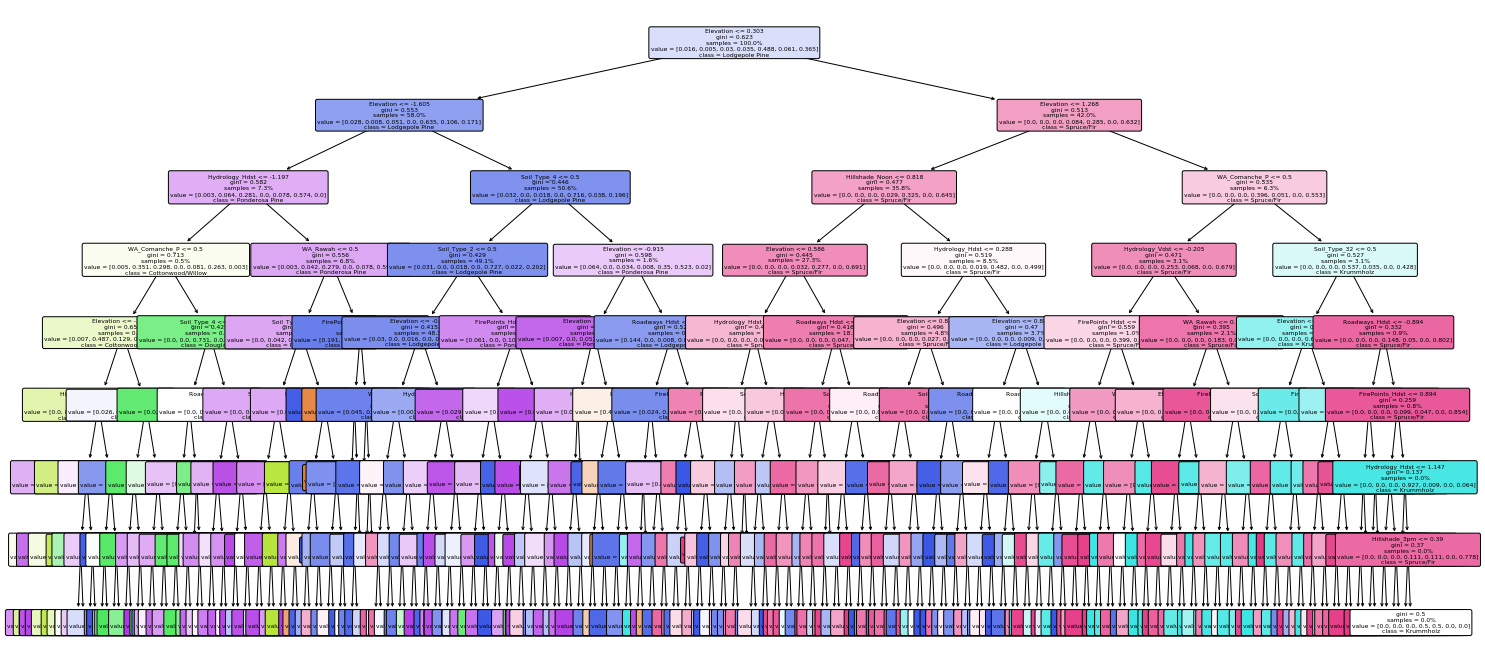

In [60]:
from sklearn import tree 
nomes_atributos = numeric_columns + wilderness_area_columns + soil_columns

plt.figure(figsize=(24,12))

tree.plot_tree(my_tree,
               feature_names=nomes_atributos,
               class_names=my_tree.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=6)

Dado o fato de termos uma quantidade de colunas muito grande, tanto numericas como binárias, a árvore de decisão ficou demasiado difícil de ler.

### Árvore de Decisão sem pré-processamento

In [61]:
# preprocessor_2 apenas passa os valores originais para as matrizes de treino e teste
preprocessor_2 = ColumnTransformer([
    ('numericos',   'passthrough',    numeric_columns),
    ('binarios', 'passthrough',  wilderness_area_columns + soil_columns),
    ], 
    sparse_threshold=0)

X_train_tree = preprocessor_2.fit_transform(df_train)
X_test_tree = preprocessor_2.transform(df_test)

In [62]:
tree_2 = DecisionTreeClassifier(max_depth=12)
tree_2.fit(X_train_tree, y_train)
tree_2.classes_

array(['Aspen', 'Cottonwood/Willow', 'Douglas-fir', 'Krummholz',
       'Lodgepole Pine', 'Ponderosa Pine', 'Spruce/Fir'], dtype=object)

In [63]:
y_prob_tree_2 = tree_2.predict_proba(X_test_tree)
np.round(y_prob_tree_2[:20],decimals=2)

array([[0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.82],
       [0.  , 0.01, 0.12, 0.  , 0.03, 0.84, 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.88, 0.  , 0.11],
       [0.07, 0.  , 0.03, 0.  , 0.78, 0.02, 0.11],
       [0.01, 0.  , 0.  , 0.  , 0.94, 0.  , 0.06],
       [0.55, 0.  , 0.  , 0.  , 0.39, 0.  , 0.06],
       [0.07, 0.  , 0.03, 0.  , 0.78, 0.02, 0.11],
       [0.01, 0.  , 0.  , 0.  , 0.79, 0.  , 0.2 ],
       [0.02, 0.  , 0.02, 0.  , 0.71, 0.24, 0.01],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.  , 0.8 , 0.  , 0.18],
       [0.01, 0.  , 0.  , 0.  , 0.88, 0.  , 0.11],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.  , 0.01, 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.88, 0.  , 0.11],
       [0.01, 0.  , 0.  , 0.  , 0.88, 0.  , 0.11],
       [0.  , 0.95, 0.02, 0.  , 0.  , 0.03, 0.  ],
       [0.02, 0.  , 0.  , 0.  ,

In [64]:
y_predict_tree_2 = tree_2.predict(X_test_tree)
y_predict_tree_2

array(['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Spruce/Fir', 'Spruce/Fir'], dtype=object)

In [65]:
print("Acurácia: ", accuracy_score(y_test,y_predict_tree_2))
print('Precisão(weighted):', precision_score(y_test, y_predict_tree_2, labels, average='weighted'))
print('Recall(weighted):', recall_score(y_test, y_predict_tree_2, labels, average='weighted'))
print('f1(weighted):', f1_score(y_test, y_predict_tree_2, labels, average='weighted'))

Acurácia:  0.8053578651153585
Precisão(weighted): 0.803696927551793
Recall(weighted): 0.8053578651153585
f1(weighted): 0.8023956200014435


[Text(676.1978153935186, 627.2307692307693, 'Elevation <= 3044.5\ngini = 0.623\nsamples = 100.0%\nvalue = [0.016, 0.005, 0.03, 0.035, 0.488, 0.061, 0.365]\nclass = Lodgepole Pine'),
 Text(309.3129050925926, 577.0523076923077, 'Elevation <= 2510.5\ngini = 0.553\nsamples = 58.0%\nvalue = [0.028, 0.008, 0.051, 0.0, 0.635, 0.106, 0.171]\nclass = Lodgepole Pine'),
 Text(148.1990162037037, 526.8738461538462, 'Hydrology_Hdst <= 15.0\ngini = 0.582\nsamples = 7.3%\nvalue = [0.003, 0.064, 0.281, 0.0, 0.078, 0.574, 0.0]\nclass = Ponderosa Pine'),
 Text(82.00648148148149, 476.6953846153847, 'WA_Comanche_P <= 0.5\ngini = 0.713\nsamples = 0.5%\nvalue = [0.005, 0.351, 0.298, 0.0, 0.081, 0.263, 0.003]\nclass = Cottonwood/Willow'),
 Text(51.73125, 426.51692307692315, 'Elevation <= 2340.5\ngini = 0.652\nsamples = 0.4%\nvalue = [0.007, 0.487, 0.129, 0.0, 0.081, 0.296, 0.0]\nclass = Cottonwood/Willow'),
 Text(25.388425925925926, 376.33846153846156, 'Hillshade_9am <= 194.5\ngini = 0.545\nsamples = 0.3%\nva

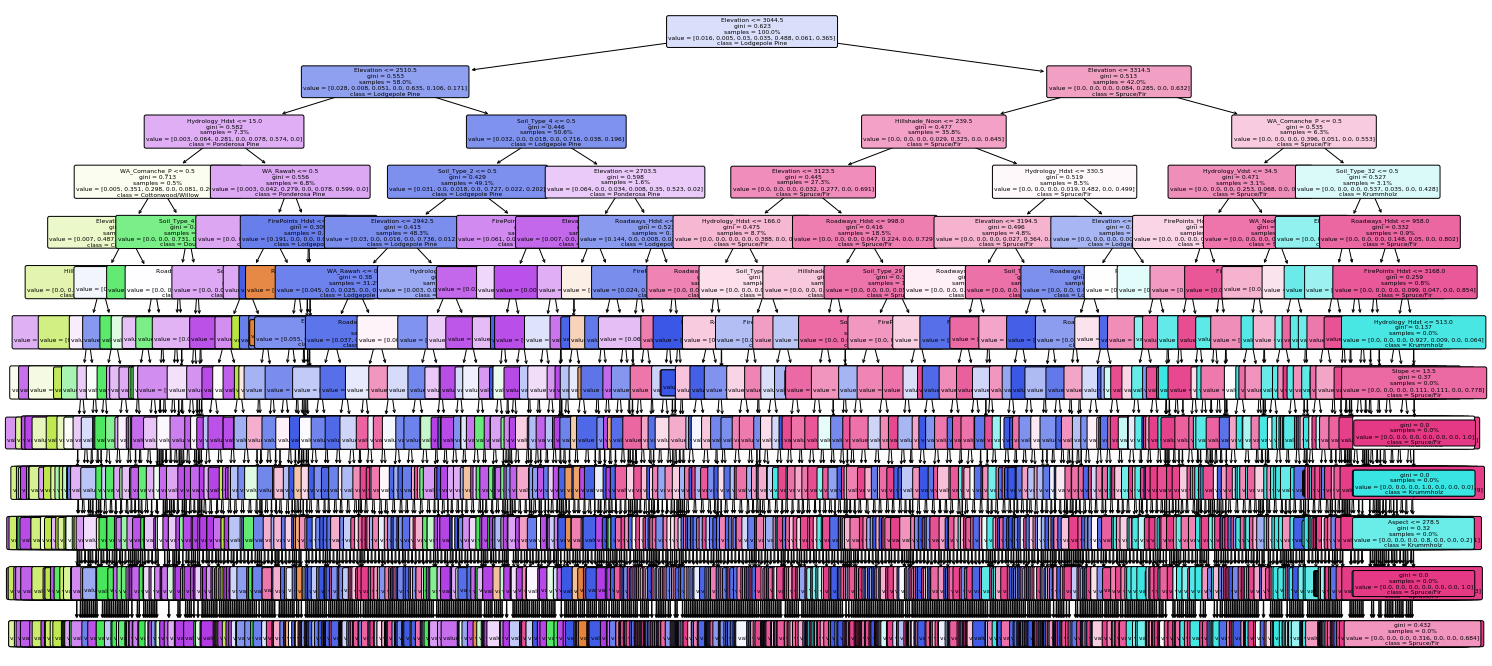

In [66]:
from sklearn import tree

plt.figure(figsize=(24,12))

tree.plot_tree(tree_2,
               feature_names=nomes_atributos,
               class_names=tree_2.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=6)

# Comitês de Aprendizagem

In [90]:
from sklearn.ensemble import VotingClassifier

logreg2 = LogisticRegression(max_iter=1500)
tree2 = DecisionTreeClassifier(max_depth=3)

voter = VotingClassifier(
                           estimators=[('log_reg',logreg2),
                                       ('arvore',tree2),
                                      ],
                            voting='soft',
                            n_jobs=-1)

In [91]:
for estimador in (logreg2,tree2,voter):
    estimador.fit(X_train, y_train)
    previsoes = estimador.predict(X_test)
    print("Acurária ", estimador.__class__.__name__,np.round(accuracy_score(  y_test, previsoes),decimals=3))

Acurária  LogisticRegression 0.724
Acurária  DecisionTreeClassifier 0.678
Acurária  VotingClassifier 0.71


In [92]:
y_probabilidade_votador = voter.predict_proba(X_test)
np.round(y_probabilidade_votador,decimals=2)

array([[0.02, 0.  , 0.01, ..., 0.79, 0.02, 0.16],
       [0.  , 0.  , 0.  , ..., 0.48, 0.  , 0.5 ],
       [0.  , 0.02, 0.34, ..., 0.04, 0.59, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.24, 0.  , 0.75],
       [0.02, 0.  , 0.15, ..., 0.67, 0.04, 0.12],
       [0.  , 0.  , 0.  , ..., 0.18, 0.  , 0.8 ]])

In [93]:
y_previsto_votador = voter.predict(X_test)
y_previsto_votador

array(['Lodgepole Pine', 'Spruce/Fir', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Spruce/Fir'], dtype=object)

In [94]:
print("Matriz de confusão:")
print(confusion_matrix(y_test,y_previsto_votador))
print("Acurácia: ", accuracy_score(y_test,y_previsto_votador))
print('Precisão(weighted):', precision_score(y_test, y_previsto_votador, labels, average='weighted'))
print('Recall(weighted):', recall_score(y_test, y_previsto_votador, labels, average='weighted'))
print('f1(weighted):', f1_score(y_test, y_previsto_votador, average='weighted'))

Matriz de confusão:
[[    0     0     0     0  1918    11     0]
 [    0   148    60     0     0   338     0]
 [    0     8   246     0   994  2248     0]
 [    0     0     0  1906    26     0  2154]
 [    0     4    98    10 44915   701 10874]
 [    0    25    94     0  1239  5911     0]
 [    0     0     1   442 12437    14 29381]]
Acurácia:  0.7100246981575347


C:\Users\John Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisão(weighted): 0.6947176617614687
Recall(weighted): 0.7100246981575347


NameError: name 'y_pred_forest' is not defined

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_forest = RandomForestClassifier(
    n_estimators=120,
    max_features='sqrt',
    max_samples=0.5,
    random_state=1,
    n_jobs=-1)
rd_forest.fit(X_train, y_train)
rd_forest.classes_

In [43]:
y_pred_forest = rd_forest.predict(X_test)

In [44]:
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest, labels)
pd.DataFrame(conf_matrix_forest, index=labels, columns=labels)

,Aspen,Lodgepole Pine,Spruce/Fir,Krummholz,Ponderosa Pine,Douglas-fir,Cottonwood/Willow
Aspen,1407,468,23,0,24,7,0
Lodgepole Pine,60,54935,1347,21,145,94,0
Spruce/Fir,19,2727,39441,86,1,1,0
Krummholz,0,31,245,3810,0,0,0
Ponderosa Pine,4,146,1,0,6948,143,27
Douglas-fir,1,105,4,0,286,3081,19
Cottonwood/Willow,0,0,0,0,73,10,463


In [45]:
print("Acurácia: ", accuracy_score(y_test,y_pred_forest))
print('Precisão(weighted):', precision_score(y_test, y_pred_forest, labels, average='weighted'))
print('Recall(weighted):', recall_score(y_test, y_pred_forest, labels, average='weighted'))
print('f1(weighted):', f1_score(y_test, y_pred_forest, labels, average='weighted'))

Acurácia:  0.9473507568651411
Precisão(weighted): 0.9476062919025594
Recall(weighted): 0.9473507568651411
f1(weighted): 0.947015760018252


In [32]:
rd_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=0.5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)